# Model Visualization Notebook
 - This notebook consists of diff. plots and graphs of our Best Model **(XG Boost)**.
 - Also compared with other models tried while training.

## 1. Import Libraries

In [5]:
import numpy as np 
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loding saved Metrics and Results

In [8]:
report_path = 'D:\\DATA_SCIENCE_A.I\\INX Fututre Inc\\artifacts\\best_model_metrics\\model_scores.csv'
prediction_path = 'D:\\DATA_SCIENCE_A.I\\INX Fututre Inc\\artifacts\\best_model_metrics\\predictions.csv'

report_df = pd.read_csv(report_path)
prediction_df = pd.read_csv(prediction_path)

xgb_cm = np.load('D:\\DATA_SCIENCE_A.I\\INX Fututre Inc\\artifacts\\best_model_metrics\\confusion_matrix.npy')
with open('D:\\DATA_SCIENCE_A.I\\INX Fututre Inc\\artifacts\\best_model_metrics\\classification_report.json','r') as f:
    xgb_cr = json.load(f)

In [10]:
# report [model scores]
report_df

,Model,Train Accuracy,Train Precision,Train F1,Test Accuracy,Test Precision,Test F1
0,Logistic Regression,0.879699,0.851719,0.822018,0.845494,0.815935,0.740940
1,Decision Tree,1.000000,1.000000,1.000000,0.875536,0.819354,0.814120
2,Random Forest,1.000000,1.000000,1.000000,0.918455,0.910019,0.860430
3,Gradient Boosting,0.995704,0.994705,0.993697,0.948498,0.940992,0.909223
4,Ada Boost,0.735768,0.664432,0.681172,0.729614,0.675421,0.670839
5,SVM,0.887218,0.920318,0.814134,0.824034,0.809513,0.688168
6,XG Boost,1.000000,1.000000,1.000000,0.952790,0.951569,0.921072


## 3. Visualizing Models Score

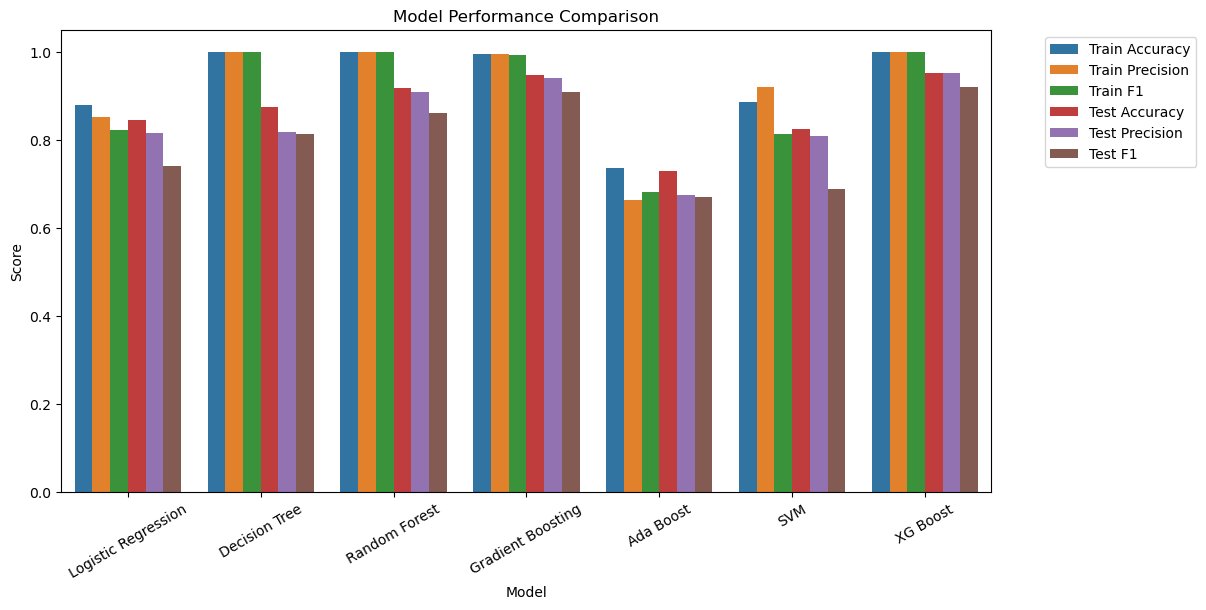

In [18]:
# plotting models score
df_melted = report_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Score", hue="Metric", data=df_melted)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

- Best Model: **XG Boost**

## 4. Confusion Matrix Plot [XG Boost]

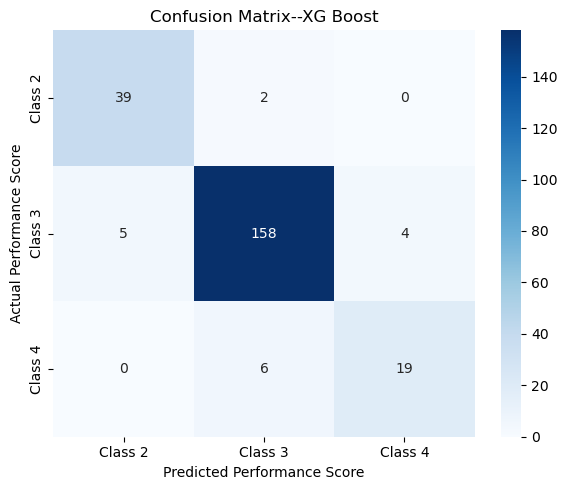

In [29]:
class_labels = ['Class 2','Class 3','Class 4']

plt.figure(figsize=(6, 5))
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix--XG Boost')
plt.xlabel('Predicted Performance Score')
plt.ylabel('Actual Performance Score')
plt.tight_layout()

## 5. Classification Report XG Boost

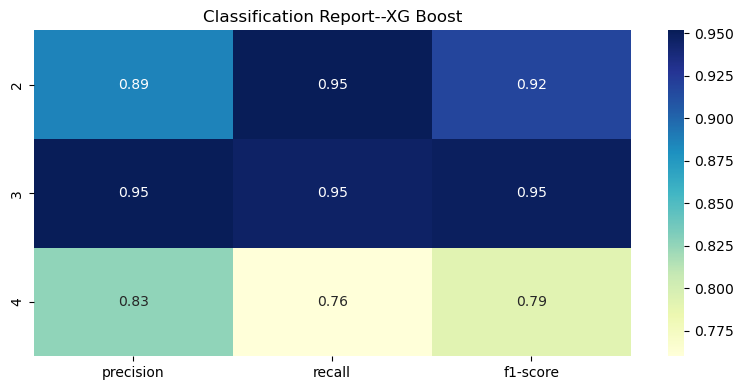

In [36]:
# Convert to DataFrame and filter classes only
xgb_cr_df = pd.DataFrame(xgb_cr).T
xgb_cr_df = xgb_cr_df.drop(index=['accuracy', 'macro avg', 'weighted avg'])

plt.figure(figsize=(8, 4))
sns.heatmap(xgb_cr_df[['precision', 'recall', 'f1-score']], annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Classification Report--XG Boost')
plt.tight_layout()

## 6. Prediction vs Actual Class Counts

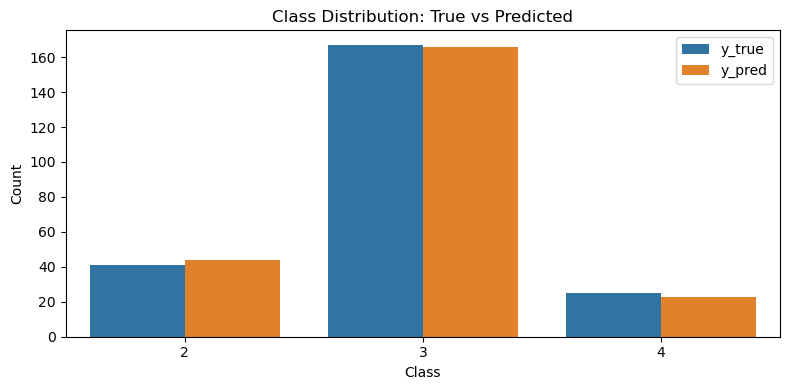

In [58]:
plt.figure(figsize=(8, 4))
sns.countplot(x='value', hue='variable', data=pd.melt(prediction_df, value_vars=['y_true', 'y_pred']))
plt.title('Class Distribution: True vs Predicted')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()

- We can see the balance is quite good our model is performing well.

## 7. Top Misclassifications

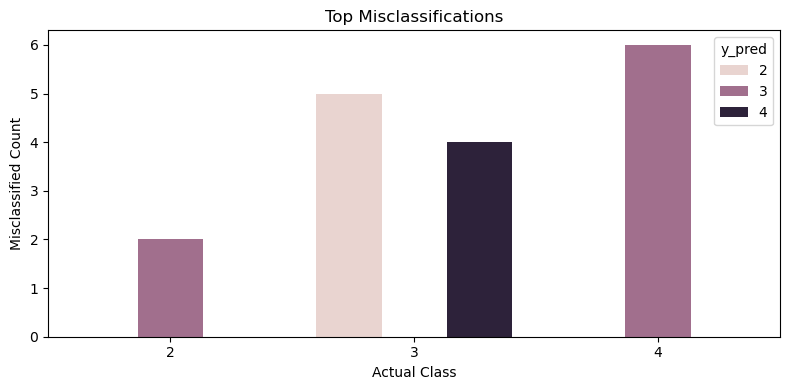

In [62]:
error_df = prediction_df[prediction_df['y_true'] != prediction_df['y_pred']]
error_counts = error_df.groupby(['y_true', 'y_pred']).size().reset_index(name='count')

plt.figure(figsize=(8, 4))
sns.barplot(data=error_counts, x='y_true', y='count', hue='y_pred')
plt.title('Top Misclassifications')
plt.xlabel('Actual Class')
plt.ylabel('Misclassified Count')
plt.tight_layout()

- y_pred of class 3 has misclassification as 2 and 4 both that's why two bars in class 3.